## Text Processing for the Novel Sherlock Holmes

#### Importing Libraries

In [1]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aashi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aashi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aashi Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

####  Reading Novel and converting it into a text variable

In [5]:
file = open(r"sherlock.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [6]:
type(file)

_io.TextIOWrapper

In [7]:
text[:2000] #first 2000 characters of out Novel T1

"\ufeffProject Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan DoyleThis eBook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  You may copy it, give it away orre-use it under the terms of the Project Gutenberg License includedwith this eBook or online at www.gutenberg.netTitle: The Adventures of Sherlock HolmesAuthor: Arthur Conan DoyleRelease Date: November 29, 2002 [EBook #1661]Last Updated: May 20, 2019Language: EnglishCharacter set encoding: UTF-8*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***Produced by an anonymous Project Gutenberg volunteer and Jose MenendezcoverThe Adventures of Sherlock Holmesby Arthur Conan DoyleContents   I.     A Scandal in Bohemia   II.    The Red-Headed League   III.   A Case of Identity   IV.    The Boscombe Valley Mystery   V.     The Five Orange Pips   VI.    The Man with the Twisted Lip   VII.   The Adventure of the Blue Carbuncle   VIII.  The Adventure of the Spe

In [41]:
len(text)

569578

### Preprocessing

In [8]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
#Converting the text into lower case         
cleantext = cleantext.lower()

In [9]:
cleantext[:2000]  #first 2000 characters of our clean text

'\ufeffproject gutenbergs the adventures of sherlock holmes by arthur conan doylethis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergnettitle the adventures of sherlock holmesauthor arthur conan doylerelease date november 29 2002 ebook 1661last updated may 20 2019language englishcharacter set encoding utf8 start of this project gutenberg ebook the adventures of sherlock holmes produced by an anonymous project gutenberg volunteer and jose menendezcoverthe adventures of sherlock holmesby arthur conan doylecontents   i     a scandal in bohemia   ii    the redheaded league   iii   a case of identity   iv    the boscombe valley mystery   v     the five orange pips   vi    the man with the twisted lip   vii   the adventure of the blue carbuncle   viii  the adventure of the speckled band   ix    the adventure o

#### Visualization

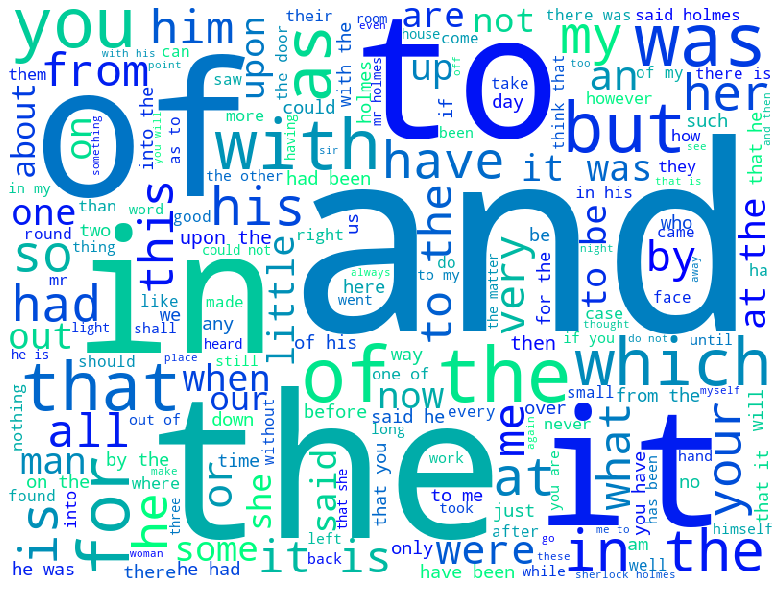

In [10]:
# Word cloud without removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

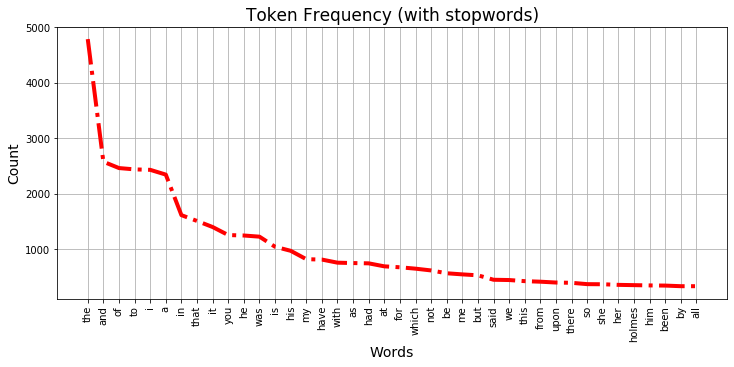

In [11]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [12]:
tokens = word_tokenize(cleantext)
tokens[:15]   #first 15 tokens

['\ufeffproject',
 'gutenbergs',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doylethis',
 'ebook',
 'is',
 'for',
 'the']

In [13]:
type(tokens)

list

In [42]:
len(tokens)

48120

#### Removing stopwords and tokenization

In [14]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

In [15]:
finaltext[:2000] #first 2000 characters of our final text

'\ufeffproject  gutenbergs  adventures  sherlock  holmes  arthur  conan  doylethis  ebook  use  anyone  anywhere  cost  withalmost  restrictions  whatsoever  may  copy  give  away  orreuse  terms  project  gutenberg  license  includedwith  ebook  online  wwwgutenbergnettitle  adventures  sherlock  holmesauthor  arthur  conan  doylerelease  date  november  29  2002  ebook  1661last  updated  may  20  2019language  englishcharacter  set  encoding  utf8  start  project  gutenberg  ebook  adventures  sherlock  holmes  produced  anonymous  project  gutenberg  volunteer  jose  menendezcoverthe  adventures  sherlock  holmesby  arthur  conan  doylecontents  scandal  bohemia  ii  redheaded  league  iii  case  identity  iv  boscombe  valley  mystery  v  five  orange  pips  vi  man  twisted  lip  vii  adventure  blue  carbuncle  viii  adventure  speckled  band  ix  adventure  engineers  thumb  x  adventure  noble  bachelor  xi  adventure  beryl  coronet  xii  adventure  copper  beechesi  scandal 

#### Visualization

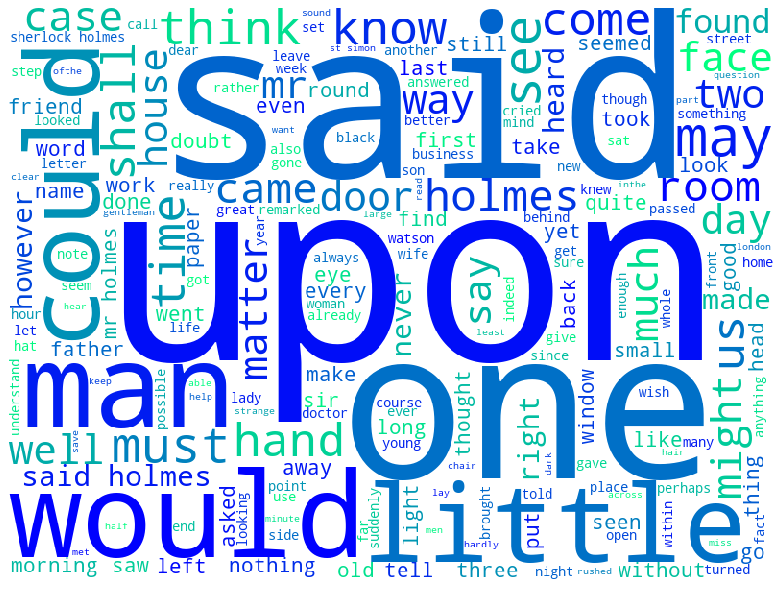

In [16]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#### Frequency distribution of tokens

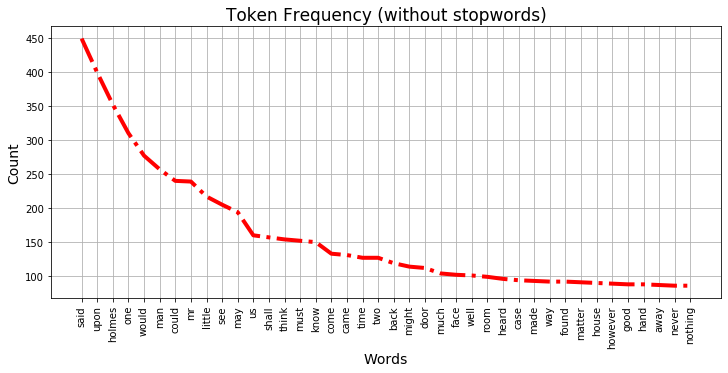

#### PoS Tagging and Frequency Distribution of Tags on Text

In [18]:
tagged = nltk.pos_tag(tokens) 
tagged[:15] #first 15 POS tags

[('\ufeffproject', 'JJ'),
 ('gutenbergs', 'NN'),
 ('adventures', 'NNS'),
 ('sherlock', 'VBP'),
 ('holmes', 'NNS'),
 ('arthur', 'VBP'),
 ('conan', 'VB'),
 ('doylethis', 'NN'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN'),
 ('anywhere', 'RB'),
 ('cost', 'VBZ'),
 ('withalmost', 'NN'),
 ('restrictions', 'NNS')]

In [19]:
type(tagged)

list

In [20]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 15904, 'JJ': 8866, 'VBD': 4097, 'NNS': 3724, 'RB': 3582, 'VBP': 2023, 'VB': 1742, 'VBN': 1683, 'VBG': 1607, 'IN': 1266, 'MD': 1157, 'CD': 811, 'VBZ': 556, 'PRP': 196, 'JJR': 152, 'DT': 132, 'JJS': 132, 'WP': 128, 'RP': 86, 'RBR': 78, 'FW': 47, 'CC': 35, 'WDT': 32, 'NNP': 31, 'WP$': 16, 'WRB': 12, '$': 8, 'RBS': 7, 'UH': 4, 'PRP$': 4, 'EX': 2})


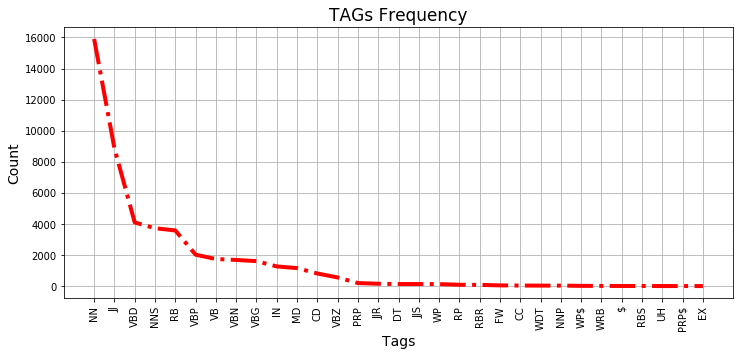

In [21]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('TAGs Frequency',size=17)
plt.xlabel('Tags',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### For word length vs Frequency distribution

In [47]:
import numpy as np
bin_size=np.linspace(0,16)

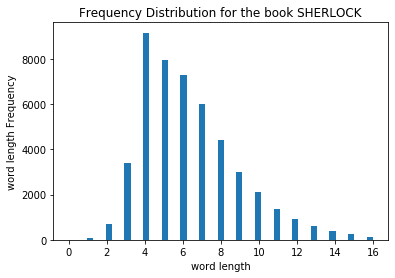

In [23]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book SHERLOCK')
plt.show()


In [ ]:
#End of code :)) 